In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as s
import matplotlib as mpl

In [52]:
mpl.style.use('VLD')
mpl.rcParams['font.sans-serif'].insert(0, 'Arial')

In [56]:
means

281.7862863735663

array([-4.85278427, -4.54342734, -3.9515326 , -3.25268412, -2.76264856,
       -2.3996541 , -1.77824293, -1.43058232, -0.60204684, -0.27218076,
        0.40065336,  0.91936576,  1.22445427,  1.82616178,  2.31016085,
        2.73320455,  3.44239946,  3.78448931,  4.46984612,  5.02697597])

In [234]:
x = np.linspace(-10,10,200)
def gen_gaussians():

   
    N=10
    means = np.linspace(-10, 10, N) + (np.random.normal(0, 0.5, size=N)); widths = 0.5*(np.abs(np.random.normal(1.0, 0.3, size=N))+0.5)
    signs = 2*np.random.randint(0, 2, size=N) -1
    y = [signs[i]*s.norm.pdf(x, means[i], widths[i]) for i in range(len(means))]

    for i in range(len(y)):
        if np.abs(y[i]).max() > 0.3:
            # print(i)
            y[i] *= 0.1

    Y = np.sum(y, axis=0)

    return Y

Ys = []

for i in range(100):
    Ys.append(gen_gaussians())


In [242]:
# np.savetxt('test_function_data2.txt', [x, Ys[15]])

# x, Y = np.genfromtxt('test_function_data.txt')

In [253]:
from scipy import interpolate as i1

In [284]:
fit = i1.interp1d(x, Ys[15], kind='cubic')

In [334]:
Np = 8
xt = np.linspace(-6, 6, Np) + np.random.rand(Np)*2.5

In [378]:
Nex = 10
xtra = np.linspace(-6, 6, Nex) + np.random.rand(Nex)*2.5

In [379]:
xt.sort()
xt = np.hstack(([-7], xt, [7]))

In [382]:
fitx = np.hstack((xt[1:-1], xtra)); fitx.sort()
fitx

array([-7.        , -5.30242472, -4.3927558 , -4.25236755, -3.69185207,
       -3.3311302 , -2.39197605, -0.56238085, -0.04846228,  0.49005796,
        1.48532722,  2.43036989,  2.87233582,  4.59287723,  4.73326431,
        5.19893489,  5.86482658,  6.84937835,  7.        ,  7.82008601])

In [383]:
fit_poor = i1.interp1d(fitx, fit(fitx), kind='cubic')

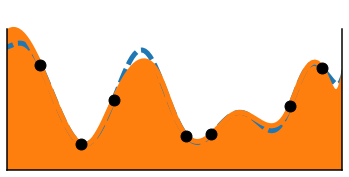

In [428]:
fig, axs = plt.subplots(figsize=(6, 3))

axs.plot(x, Ys[15], ls=(0, (3,1)), lw=5)

axs.spines.top.set_visible(False)
axs.spines.left.set_bounds((-0.07, 0.068))
axs.spines.right.set_bounds((-0.07, 0.068))
axs.set_xticks([])
axs.set_yticks([])
axs.set(xlim=(-6.6, 6.65))
axs.set(ylim=(-0.07, 0.09))
axs.scatter(xt, fit(xt), s=120, c='k', zorder=10)
l2, = axs.plot(x[np.argwhere(x>-7)[0,0]: np.argwhere(x<7)[-1,0]], fit_poor(x[np.argwhere(x>-7)[0,0]: np.argwhere(x<7)[-1,0]]), lw=5)
axs.fill_between(x[np.argwhere(x>-7)[0,0]: np.argwhere(x<7)[-1,0]],  fit_poor(x[np.argwhere(x>-7)[0,0]: np.argwhere(x<7)[-1,0]]),
np.zeros(len(x[np.argwhere(x>-7)[0,0]: np.argwhere(x<7)[-1,0]]))-0.075, color=l2.get_color())
fig.savefig('example_function.pdf', bbox_inches='tight')

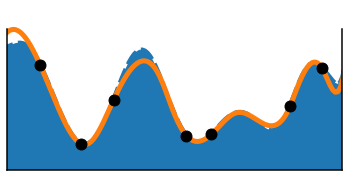

In [426]:
fig, axs = plt.subplots(figsize=(6, 3))

l1, = axs.plot(x, Ys[15], ls=(0, (3,1)), lw=5)

axs.spines.top.set_visible(False)
axs.spines.left.set_bounds((-0.07, 0.068))
axs.spines.right.set_bounds((-0.07, 0.068))
axs.set_xticks([])
axs.set_yticks([])
axs.set(xlim=(-6.6, 6.65))
axs.set(ylim=(-0.07, 0.09))
axs.scatter(xt, fit(xt), s=120, c='k', zorder=10)
l2, = axs.plot(x[np.argwhere(x>-7)[0,0]: np.argwhere(x<7)[-1,0]], fit_poor(x[np.argwhere(x>-7)[0,0]: np.argwhere(x<7)[-1,0]]), lw=5)
axs.fill_between(x,  Ys[15],
np.zeros(len(x))-0.075, color=l1.get_color())
fig.savefig('example_function_1.pdf', bbox_inches='tight')

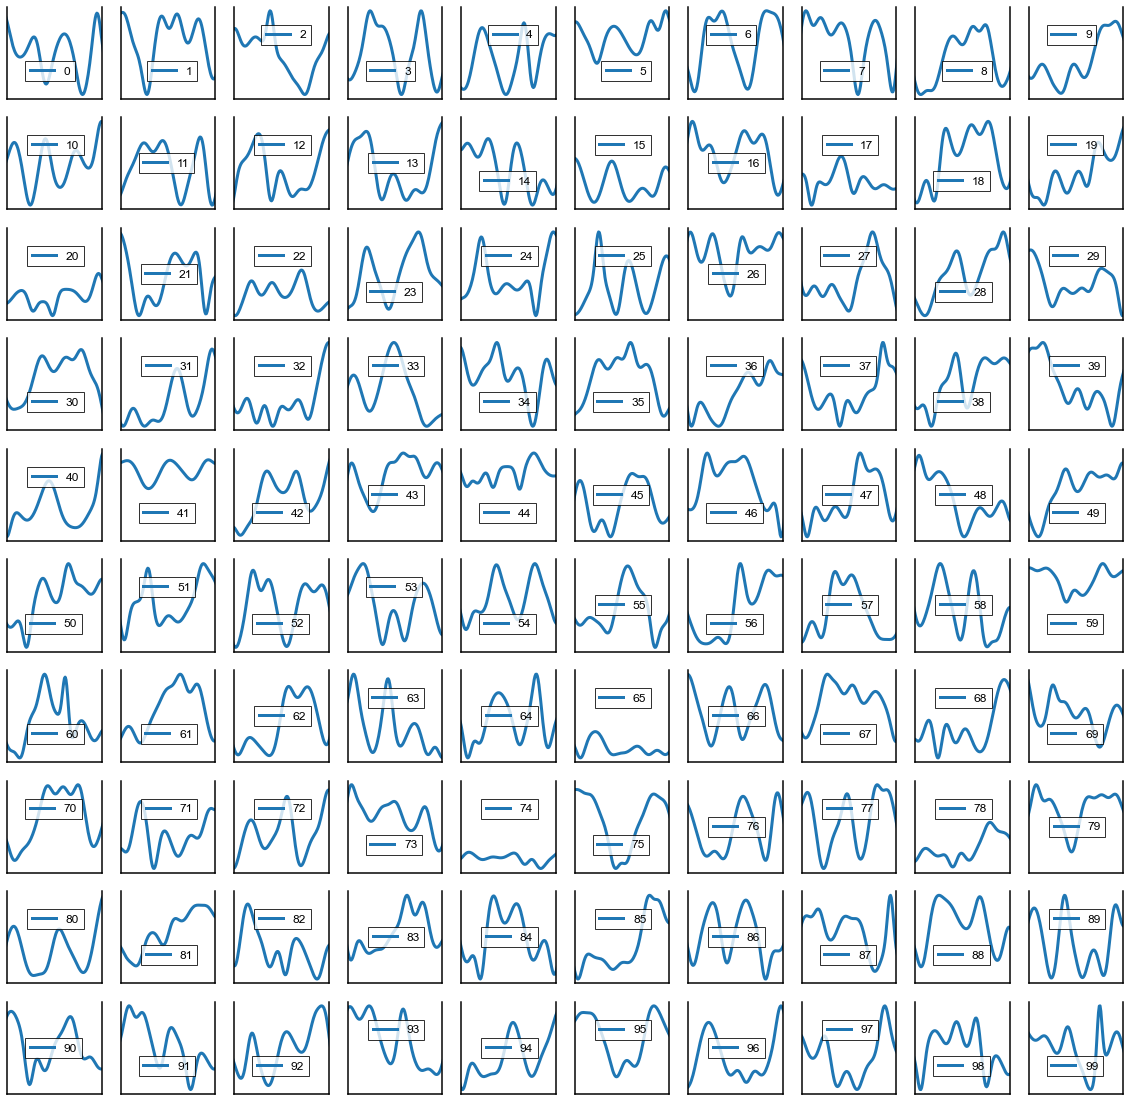

In [235]:
fig, axs = plt.subplots(10, 10, figsize=(20, 20))
axs = axs.flatten()

for i in range(100):
    axs[i].plot(x, Ys[i], label=i)
    axs[i].legend()
    axs[i].spines.top.set_visible(False)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set(xlim=(-6, 6))
    # , ylim=(-0.5, 0.5))

In [429]:
np.sqrt(-1)

/tmp/ipykernel_2023022/3438155168.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(-1)


nan